<img src="./img/HWNI_logo.svg"/>

# Lab 03b - Paired t-tests and Non-Parametric Tests

In [1]:
# makes our plots show up inside Jupyter
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

# choose colors that work for most color-blind folks
sns.set_palette("colorblind")
sns.set(color_codes=True)

import util.lab03utils as utils 

# this makes our tables easier to read
utils.formatDataframes()

## Dataset Introduction

Certain types of nerve cells have the ability to regenerate a part of the cell that has been amputated. In an early study of this process, measurements were made on the nerves in the spinal cord of rhesus monkeys. Nerves emanating from the left side of the cord were cut, while nerves from the right side were kept intact. During the regeneration process, the amount of creatine phosphate (CP) was measured in the left and right portions of the spinal cord. You are interested in whether CP levels are different between the cut and control sides of the spinal cord. 

 *adapted from Samuels & Witmer, pg 387. Originally: Bodian (1947)*

**Q1** Why is a paired test appropriate for this dataset? What are we assuming about the data when we choose to use a paired t-test in particular?

**Q2** This experiment could've been run by severing both sides of the spinal cord in one set of monkeys and neither side in a control group. What makes this experimental design likely superior?

## Loading and Tidying Data

We begin by loading the data and taking a look at it. As is common in studies involving primates, the number of organisms used is quite small, so we can view all of the data at once.

In [2]:
cpData = pd.read_csv("./data/3b.csv",index_col=None)

In [3]:
cpData

,cpLevel,side,organismIdx
0,16.3,Control_R,1
1,4.8,Control_R,2
2,10.9,Control_R,3
3,14.2,Control_R,4
4,16.3,Control_R,5
5,9.9,Control_R,6
6,29.2,Control_R,7
7,22.4,Control_R,8
8,11.5,Regen_L,1
9,3.6,Regen_L,2


Notice, however, that this time our data is not "tidy" -- our "unit of observation" is one organism, but each row doesn't correspond to an organism. Instead, it corresponds to a measurement of creatine phosphate levels.

Luckily, our collaborator has included enough information that we can tidy this data up. The dataframe that we want to have has rows corresponding to values of `organismIdx` and two new columns, `Control_R` and `Regen_L`, which should be populated with values from `cpLevel`.

This operation of "reorganization" is common enough that pandas has a function to do it for us: `dataframe.pivot`. We tell is which column gives us the row `index`, which column gives us the new `columns`, and which column gives us the new `values`, like so:

In [4]:
tidy = cpData.pivot(index="organismIdx",columns="side",values="cpLevel")
tidy

side,Control_R,Regen_L
organismIdx,,
1,16.3,11.5
2,4.8,3.6
3,10.9,12.5
4,14.2,6.3
5,16.3,15.2
6,9.9,8.1
7,29.2,16.6
8,22.4,13.1


Because the first format is always longer than the second, it's also called the *long format*, while the tidy format is also called the "wide format". As more and more folks get on board the tidy data train, these non-judgmental names for the formats are likely to fall out of favor.

For more on the philosophy of tidy data (written from an R perspective), check out this [paper by Hadley Wickham](http://www.jeannicholashould.com/tidy-data-in-python.html), developer of some of the most prominent stats packages for the R programming language. For some more practical examples of cleaning up messy data in Python, check out [this blog post by Jean Nicholas Hould](http://www.jeannicholashould.com/tidy-data-in-python.html).

## Visualizing Paired Data

If you need more convincing that tidy data formats are better, check out the code cell below. In just one line, it produces a histogram for each column and a scatterplot for each pair of columns -- what seaborn calls a `pairplot`. These can be very useful for exploring lots of pairwise relationships by eye very quickly.

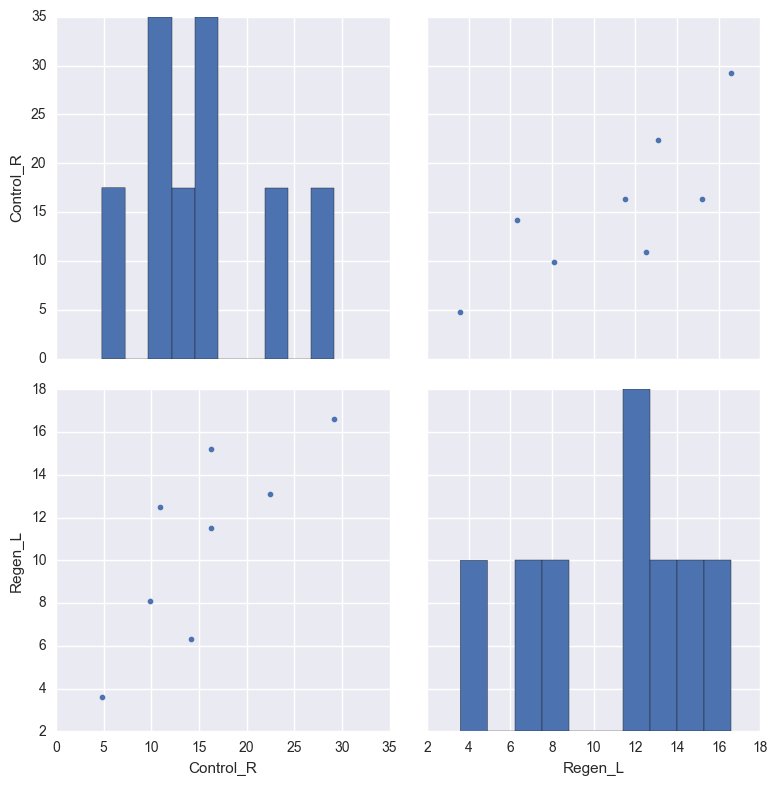

In [5]:
sns.pairplot(tidy,size=4,aspect=1);

As another, simpler, way to visualize the data, compute the differences between the control and regenerating sides and make a stripplot.

** Q3 ** Why do we take the difference? What does this have to do with our choice of the paired t-test?

** Q4 **Based on this visualization, do you expect the result to be statistically significant or not? Why or why not?

More common than either of these visualizations, at least in the biological literature, is a plot that shows the observations as neighboring stripplots with lines connecting pairs.

Run the cell below to generate just such a plot. Check out the `utils` module if you want to see how it's done -- since seaborn doesn't offer this as a basic plot, it requires a bit of matplotlib-fu.

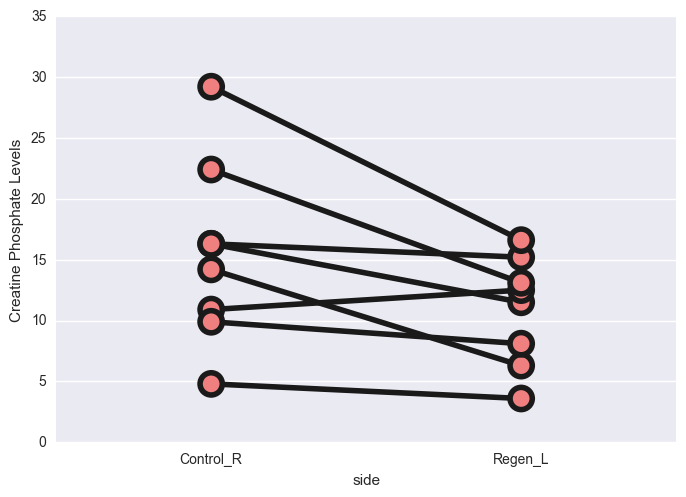

In [7]:
utils.differencePlot(tidy,ylabel="Creatine Phosphate Levels")

** Q5 ** What visual aspects of this plot indicate whether an effect is likely to be statistically significant or insignificant? Of the plots we made -- the pairplot scatter plots, the stripplot of differences, or the difference plot -- which do you prefer? Why? Which would you use in a publication?

## Running a Paired t-Test

First, run the unpaired version of the t-test, as in the first half of the lab.

** Q6 ** Is the result significant at $\alpha$ = 0.05? (NB: Future uses of the term "significant" imply significant at this level of $\alpha$).

Scipy also has a paired version of the t-test: `scipy.stats.ttest_rel`, for `rel`ated measurements `t-test`. Run the paired test (the syntax for the function is much the same as for the unpaired test). 

** Q7 ** Is the result significant? If you got different answers for the two tests, explain why this is the case.

** Q8 **Say I gave you one measurement of creatine phosphate from a new organism's spinal cord. Based on your results, would you expect to be able to tell whether this measurement was from a spine undergoing regeneration? Why or why not? Does your answer change if I give you more measurements, all from different organisms in the same group?

** Q9 ** Now say I gave you two measurements of creatine phosphate, both from the same organism, one before and one after severing its spinal cord. Based on your results, do you expect to be able to tell which is which? Why or why not?

## Non-Parametric Test: Wilcoxon

** Q9 ** What would be the argument for using a non-parametric test in this case? Are there any arguments against?

Use the wilcoxon signed-rank test to perform a non-parametric paired test. Unfortunately, scipy doesn't implement an exact version of the signed-rank test for small sample sizes, so the p-value you calculate will be incorrect and you should receive a `"Warning: sample size too small for normal approximation"`.

** Q10 ** Despite this error, and the weaker power of the non-parametric test, do you report a significant difference based on the Wilcoxon test?